# Data Mining Project
### Giorgio Donati, g.donati24@studenti.unipi.it
### Pietro Francaviglia, p.francaviglia1@studenti.unipi.it
#### A.Y. 2021-2022


## Libraries and datasets

In [1]:
from sklearn import tree

from t3_constants import *
from t3_utility import *

# Decision Tree
## Training

In [2]:
with open(f'{PICKLE_FOLDER}{TRAIN}{X}.pkl', 'rb') as f:
    train_x = pickle.load(f)
with open(f'{PICKLE_FOLDER}{TRAIN}{Y}.pkl', 'rb') as f:
    train_y = pickle.load(f)

In [3]:
# parameters dictionary for Decision Tree grid search
param_d = {
    CRT: ['gini', 'entropy'],
    MID: [0, 1, 1e-1, 1e-2, 1e-3, 1e-4],
    MSL: [1, 3, 5]
}
# iteration on parameters to collect results
combinations = itertools.product(*[param_d[key] for key in sorted(param_d)])
results = []
for criterion, min_impurity_decrease, min_samples_leaf in combinations:
    model = tree.DecisionTreeClassifier(
        criterion=criterion,
        min_impurity_decrease=min_impurity_decrease,
        min_samples_leaf=min_samples_leaf,
        random_state=0
    )
    mean_val_score, std_val_score = cross_validation_summary(model, train_x.values, train_y.values)
    res = criterion, min_impurity_decrease, min_samples_leaf, mean_val_score, std_val_score
    results.append(res)

# print top 5 combination results
decision_tree_results_df = pd.DataFrame(results,columns= sorted(param_d)+[MVS,SVS])

decision_tree_results_df.sort_values(MVS, ascending=False).head(5)

,criterion,min_impurity_decrease,min_samples_leaf,mean_val_score,std_val_score
14,gini,0.0010,5,0.813016,0.029272
34,entropy,0.0001,3,0.809892,0.014803
31,entropy,0.0010,3,0.809892,0.014803
19,entropy,0.0000,3,0.809892,0.014803
35,entropy,0.0001,5,0.805092,0.013261


### Comparison between criterions

In [4]:
decision_tree_results_df.groupby(CRT)[[MVS, SVS]].mean()

,mean_val_score,std_val_score
criterion,,
entropy,0.723599,0.020388
gini,0.702642,0.028565


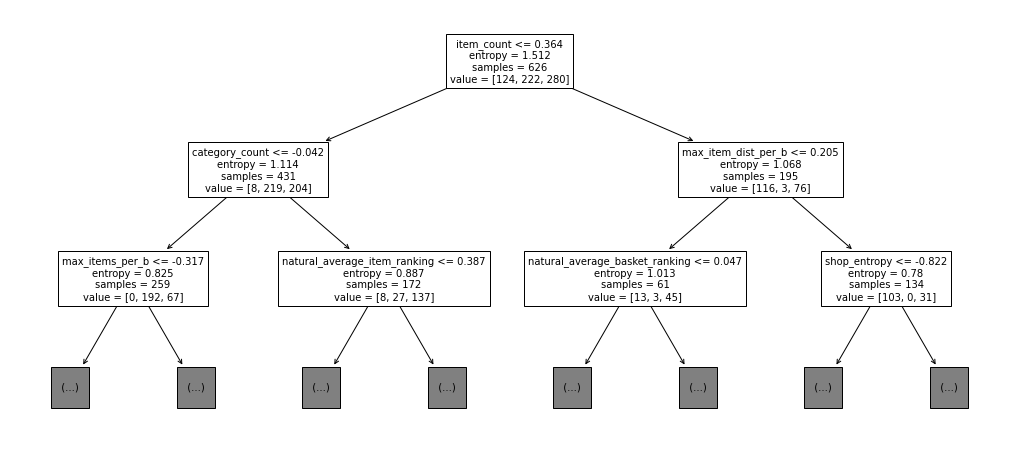

In [5]:
# choose entropy because is more reliable
best_result = decision_tree_results_df[decision_tree_results_df[CRT] == 'entropy'].sort_values(MVS).tail(1)

# best model
test_model = tree.DecisionTreeClassifier(
        criterion=best_result[CRT].values[0],
        min_impurity_decrease=best_result[MID].values[0],
        min_samples_leaf=best_result[MSL].values[0],
)
test_model.fit(train_x, train_y)

plt.figure(figsize=(18, 8))
tree.plot_tree(test_model, fontsize=10, max_depth=2, feature_names=train_x.columns)
plt.show()

### Feature importance

In [6]:
pd.Series(test_model.feature_importances_, index = train_x.columns).sort_values()

avg_baskets_per_d                 0.028208
natural_average_price_ranking     0.033355
price_entropy                     0.047415
natural_average_item_ranking      0.049095
shop_entropy                      0.052579
natural_average_basket_ranking    0.057366
category_entropy                  0.066989
max_item_dist_per_b               0.077224
max_items_per_b                   0.101140
category_count                    0.157446
item_count                        0.329184
dtype: float64

## Testing

In [7]:
with open(f'{PICKLE_FOLDER}{TEST}{X}.pkl', 'rb') as f:
    test_x = pickle.load(f)
with open(f'{PICKLE_FOLDER}{TEST}{Y}.pkl', 'rb') as f:
    test_y = pickle.load(f)

In [8]:
# Around 0.80
test_model.score(test_x, test_y)

0.8152866242038217